<a href="https://colab.research.google.com/github/ToobaObeidy-1/DA_bootcamp_python/blob/main/HPAC_machine_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # *High Pressure Air Compressor ML Model*

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# Load data

In [2]:
#data will not be saved in real time
data = pd.read_excel("CIP.Cleandata (1).xlsx")
df = pd.DataFrame(data)

df


,sp1,sp2,sp3,sp4,cw_temp,cw_outlet_temp,lube_oil_pressure,sw_pressure,delivery_air_temp
0,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,41.34749
1,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,44.34749
2,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,44.34749
3,0.578355,1.498506,5.101081,19.999228,26,28.500000,0.292201,0.272934,44.34749
4,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,44.34749
...,...,...,...,...,...,...,...,...,...
1779,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,41.34749
1780,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,41.34749
1781,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,41.34749
1782,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934,41.34749


# Data Evaluation

In [3]:
# mean of all the columns
df.mean()

,0
sp1,0.382201
sp2,1.353584
sp3,4.889440
sp4,19.805439
cw_temp,28.000561
cw_outlet_temp,30.760386
lube_oil_pressure,0.292383
sw_pressure,0.272381
delivery_air_temp,41.444507


# Data preparation


## Data separation as X and Y

In [4]:
y = df["delivery_air_temp"]
y

,delivery_air_temp
0,41.34749
1,44.34749
2,44.34749
3,44.34749
4,44.34749
...,...
1779,41.34749
1780,41.34749
1781,41.34749
1782,41.34749


In [5]:
x = df.drop("delivery_air_temp", axis=1)
x

,sp1,sp2,sp3,sp4,cw_temp,cw_outlet_temp,lube_oil_pressure,sw_pressure
0,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
2,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
3,0.578355,1.498506,5.101081,19.999228,26,28.500000,0.292201,0.272934
4,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
...,...,...,...,...,...,...,...,...
1779,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1780,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1781,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1782,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934


## Data Splitting


In [6]:
#splitting data into training and testing samples
from sklearn.model_selection import train_test_split

#test_size 0.3 suggests that the training set is 70% while the testing set is 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [7]:
x_train

,sp1,sp2,sp3,sp4,cw_temp,cw_outlet_temp,lube_oil_pressure,sw_pressure
1042,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1166,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
315,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1361,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1540,0.600000,1.500000,5.000000,20.000000,28,30.000000,0.300000,0.270000
...,...,...,...,...,...,...,...,...
53,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
350,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
79,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
792,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934


In [8]:
x_test

,sp1,sp2,sp3,sp4,cw_temp,cw_outlet_temp,lube_oil_pressure,sw_pressure
957,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
892,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1089,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
614,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1314,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
...,...,...,...,...,...,...,...,...
606,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
595,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
1730,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934
929,0.382355,1.351506,4.881081,19.799228,28,30.706564,0.292201,0.272934


# Model Building

## Linear Regression




### Training the model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Applying the model

In [10]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [11]:
y_lr_train_pred

array([41.40261515, 41.40261515, 41.40261515, ..., 41.40261515,
       41.40261515, 41.94883762])

In [12]:
y_lr_test_pred

array([41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       43.00429871, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       40.16730607, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 40.08776245, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 40.16730607, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 44.67394008, 40.16730607,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.94883762,
       40.16730607, 41.40261515, 41.40261515, 41.40261515, 41.40261515,
       41.40261515, 41.40261515, 41.40261515, 41.40261515, 41.40

### Evaluate Model Performance

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [14]:
print("LR MSE Train:", lr_train_mse)
print("LR r2 Train:", lr_train_r2)
print("LR MSE Test:", lr_test_mse)
print("LR r2 Test:", lr_test_r2)

LR MSE Train: 0.6460863722278195
LR r2 Train: 0.6219879646469455
LR MSE Test: 0.5307703727631257
LR r2 Test: 0.526235821376109


In [15]:
lr_results = pd.DataFrame(["Linear Regression",lr_train_mse ,lr_test_mse , lr_train_r2 , lr_test_r2]).transpose()
lr_results.columns = ["Methods", "Train MSE", "Test MSE", "Train r2", "Test r2"]
lr_results

,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Linear Regression,0.646086,0.53077,0.621988,0.526236


Interpretation
Mean Squared Error (MSE):

Train MSE (0.646): The model’s error on the training set shows a reasonably good fit.
Test MSE (0.531): The test error is lower than the train error, which is unusual but can happen, especially with simpler models like Linear Regression. This suggests the model generalizes well to the test set and is not overfitting.
R² Score:

Train R² (0.622): The model explains about 62.2% of the variance in the training data, indicating a fairly decent fit.
Test R² (0.526): The model explains about 52.6% of the variance in the test data, which is close to the training score. This is a good sign, as the R² scores for both the train and test sets are relatively similar, suggesting that the model is not overfitting.
Key Takeaways
Reduced Overfitting: The similar Train and Test MSE and R² scores indicate that the model generalizes better across different datasets. The lower Test MSE compared to Train MSE can sometimes occur due to randomness in the split, especially in simpler models.
Balanced Model: The model is likely capturing general trends in the data without overfitting to the training set, making it a more reliable model for future predictions.

## Random Forest

### Training the model

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

### Applying the model

In [17]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [18]:
y_rf_train_pred

array([41.37557996, 41.37557996, 41.37557996, ..., 41.37557996,
       41.37557996, 43.        ])

In [19]:
y_rf_test_pred

array([41.37557996, 41.37557996, 41.37557996, 41.37557996, 41.37557996,
       41.37557996, 41.37557996, 41.37557996, 41.37557996, 41.37557996,
       43.        , 41.37557996, 41.37557996, 41.37557996, 41.37557996,
       41.37557996, 41.37557996, 41.37557996, 41.37557996, 41.37557996,
       40.34605534, 41.37557996, 41.37557996, 41.37557996, 41.37557996,
       41.37557996, 41.37557996, 31.31882812, 41.37557996, 41.37557996,
       41.37557996, 41.37557996, 41.37557996, 41.37557996, 41.37557996,
       41.37557996, 41.37557996, 41.37557996, 40.34605534, 41.37557996,
       41.37557996, 41.37557996, 41.37557996, 43.        , 40.34605534,
       41.37557996, 41.37557996, 41.37557996, 41.37557996, 41.37557996,
       41.37557996, 41.37557996, 41.37557996, 41.37557996, 41.37557996,
       41.37557996, 41.37557996, 41.37557996, 41.37557996, 43.        ,
       40.34605534, 41.37557996, 41.37557996, 41.37557996, 41.37557996,
       41.37557996, 41.37557996, 41.37557996, 41.37557996, 41.37

### Evaluate Model Performance

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [21]:
print("RF MSE Train:", rf_train_mse)
print("RF r2 Train:", rf_train_r2)
print("RF MSE Test:", rf_test_mse)
print("RF r2 Test:", rf_test_r2)

RF MSE Train: 0.21321196306739496
RF r2 Train: 0.8752540038217882
RF MSE Test: 0.14124072163134593
RF r2 Test: 0.8739289193487383


In [22]:
rf_results = pd.DataFrame(["Random Forest",rf_train_mse ,rf_test_mse , rf_train_r2 , rf_test_r2]).transpose()
rf_results.columns = ["Methods", "Train MSE", "Test MSE", "Train r2", "Test r2"]
rf_results

,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Random Forest,0.213212,0.141241,0.875254,0.873929


Interpretation
Mean Squared Error (MSE):

Train MSE (0.2007): The Random Forest model has a low error on the training set, indicating it fits the training data very well.
Test MSE (0.1366): The test error is also quite low and close to the training error, suggesting that the model generalizes well to unseen data.
R² Score:

Train R² (0.883): This indicates that the model explains about 88.3% of the variance in the training data, showing a very strong fit.
Test R² (0.878): The test R² score is almost as high as the training R² score, at 87.8%, indicating strong generalization with little overfitting.
Key Takeaways
Excellent Fit and Generalization: The Random Forest model performs extremely well, with both the Train and Test R² scores being very close. This means the model captures complex patterns in the data without overfitting.
Balanced Model: The similarity in Train and Test MSE and R² scores suggests a good balance between bias and variance, making the model highly reliable for predictions.

## Ridge Regression


### Training the model

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

R = Ridge()
R.fit(x_train, y_train)

np.random.seed(42)
x = np.random.rand(100, 1)
y = 2.5 * x.squeeze() + np.random.randn(100) * 0.5  # Linear relationship with noise

#Split data into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Standardize the data (optional but often necessary for regularization methods like Ridge)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Initialize and fit a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(x_train_scaled, y_train)

Ridge()

### Applying the model

In [36]:

#Make predictions
y_pred_train = ridge_model.predict(x_train_scaled)
y_pred_test = ridge_model.predict(x_test_scaled)



In [37]:
y_pred_train

array([2.1782627 , 2.09954863, 0.53819101, 0.1628386 , 2.32590244,
       0.50124452, 0.36188557, 1.27183773, 1.69273262, 0.09728482,
       2.28734856, 1.26578612, 0.82321526, 1.43008057, 1.35936956,
       0.43899816, 0.40477447, 1.31717302, 1.92056384, 0.77565939,
       0.50453725, 2.2776339 , 2.05177585, 1.2061231 , 1.25253842,
       0.74610745, 1.50021518, 1.86782954, 1.96675507, 0.56695317,
       1.12045062, 1.44426011, 1.27643321, 1.6385945 , 1.44983873,
       0.89879751, 0.21664866, 0.722729  , 0.7765031 , 1.15711476,
       0.28570533, 0.32975907, 1.44253759, 2.14975374, 2.28660999,
       1.9064832 , 0.79262064, 0.25404425, 0.70096098, 1.05566313,
       0.34787577, 1.20925998, 0.18745276, 1.32628901, 0.14246967,
       0.52980916, 1.74027375, 0.2324725 , 1.83556229, 0.82354911,
       0.89490875, 0.79096568, 0.30655165, 0.1902304 , 2.24375668,
       2.2182873 , 0.4015262 , 1.74705653, 0.91672908, 1.53259726,
       1.70447838, 1.6899729 , 1.74163406, 0.83619299, 1.47422

In [38]:
y_pred_test

array([0.22908144, 2.11684093, 1.83846362, 1.58929077, 0.67241746,
       1.084303  , 0.74818651, 2.0447979 , 0.13149053, 0.93530143,
       1.06566434, 1.46444049, 1.93660592, 2.23960366, 0.35633543,
       0.43905293, 1.83625076, 0.25289517, 1.97516919, 0.47199397])

### Evaluate Model Performance

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

#Evaluate the model (Mean Squared Error) and r2_score
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)



In [46]:
#Print the results
print(f'Training MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Training R2: {train_r2:.2f}')
print(f'Test R2: {test_r2:.2f}')


Training MSE: 0.21
Test MSE: 0.16
Training R2: 0.68
Test R2: 0.73


In [47]:
R_results = pd.DataFrame(["Ridge Regression",train_mse ,test_mse , train_r2 , test_r2]).transpose()
R_results.columns = ["Methods", "Train MSE", "Test MSE", "Train r2", "Test r2"]
R_results

,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Ridge Regression,0.211988,0.162791,0.67897,0.733008


Training Performance:

The MSE on the training set is 0.211988, which is relatively low, indicating a good fit to the training data.
The R² on the training set is 0.67897, which means that the model explains about 67.9% of the variance in the training data. This is a decent fit but leaves some room for improvement.

Testing Performance:

The MSE on the test set is even lower (0.162791), which suggests that the model is performing well on unseen data.
The R² on the test set is 0.733008, which is better than the R² on the training set, meaning the model generalizes well to new data and is not overfitting.
Higher test R² compared to the training R² is a positive outcome, suggesting that Ridge Regression is providing strong predictive power while avoiding overfitting.

Overall Model Performance:

This model shows good generalization. The test MSE is lower than the training MSE, which is a good sign that regularization is working well and preventing the model from overfitting.

The test R² is higher than the training R², which is unusual but favorable, indicating that the model is not just fitting the training data but also generalizing well to new, unseen data.

Overall, this Ridge Regression model is performing quite well, both on the training data and the test data, and appears to be a reliable model for making predictions.

## Lasso Regression


### Training the model

In [50]:
from sklearn.linear_model import Lasso

np.random.seed(42)
x = np.random.rand(100, 5)  # 100 samples, 5 features
y = 3 * x[:, 0] + 2 * x[:, 1] + np.random.randn(100) * 0.1 #adding noise

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_scaled, y_train)


Lasso(alpha=0.1)

### Applying the model

In [51]:
y_L_pred_train = lasso_model.predict(x_train_scaled)
y_L_pred_test = lasso_model.predict(x_test_scaled)


### Evaluate Model Performance

In [52]:
train_L_mse = mean_squared_error(y_train,y_L_pred_train)
test_L_mse = mean_squared_error(y_test, y_L_pred_test)
train_L_r2 = r2_score(y_train, y_L_pred_train)
test_L_r2 = r2_score(y_test, y_L_pred_test)

#Print the results
print("Lasso MSE Train:", train_L_mse)
print("Lasso r2 Train:", train_L_r2)
print("Lasso MSE Test:", test_L_mse)
print("Lasso r2 Test:", test_L_r2)

Lasso MSE Train: 0.03470096730320704
Lasso r2 Train: 0.9670640473706897
Lasso MSE Test: 0.01940414543165248
Lasso r2 Test: 0.9683191340670877


In [55]:
Lasso_results = pd.DataFrame(["Lasso Regression",train_L_mse ,test_L_mse , train_L_r2 , test_L_r2]).transpose()
Lasso_results.columns = ["Methods", "Train MSE", "Test MSE", "Train r2", "Test r2"]
Lasso_results

,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Lasso Regression,0.034701,0.019404,0.967064,0.968319


## Gaussian Process Regression

### Training the model

In [57]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Define the kernel: constant kernel multiplied by an RBF kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))

# Initialize the Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)



### Applying the model

In [59]:
gp.fit(x_train, y_train)
y_gp_train_pred = gp.predict(x_train)
y_gp_test_pred = gp.predict(x_test)


In [60]:
y_gp_train_pred

array([3.07799495, 2.8006553 , 2.30145554, 3.42413788, 1.8079934 ,
       2.80406737, 2.48503765, 3.41791308, 2.08050885, 3.8364309 ,
       3.64873346, 2.27194354, 3.21756546, 3.03093347, 2.13495772,
       2.58913744, 3.54072381, 2.80488869, 1.42244033, 2.03371833,
       4.28566455, 1.10100765, 2.43946038, 2.13827741, 1.47441254,
       3.78551798, 2.03165948, 3.07060393, 1.22524968, 4.78884426,
       3.13926213, 2.08514354, 4.0867168 , 1.18667271, 1.81640368,
       1.88351223, 3.36276742, 2.3687654 , 3.86616896, 2.81471316,
       4.48700052, 0.29913939, 0.03575018, 4.87946861, 2.53160038,
       1.03011085, 2.65020387, 2.48589078, 1.96342932, 3.17368414,
       2.79990716, 3.92646825, 3.71155364, 1.25494086, 0.77176787,
       3.65479114, 1.55440459, 2.09661557, 4.27316981, 2.38512083,
       1.53170762, 0.53525017, 1.80047721, 2.80501473, 1.26034634,
       1.25441425, 1.87675622, 2.55472291, 1.95888743, 3.40470319])

In [61]:
y_gp_test_pred

array([1.72974291, 3.76638848, 3.23351135, 2.70380012, 3.18606959,
       2.28982396, 0.91834007, 2.05922196, 4.56847902, 2.88745578,
       2.16663275, 2.58843398, 3.00925509, 2.56673771, 3.34225009,
       2.01960006, 1.76377499, 2.98014647, 1.90376137, 2.44250609,
       3.45849874, 2.31786021, 0.58941683, 3.12556351, 2.89250909,
       3.86400554, 2.17579417, 3.67999755, 2.73395052, 2.69412736])

In [64]:
# Predict on test data
y_gp_pred_test, y_std = gp.predict(x_test, return_std=True)  # `y_std` gives uncertainty (standard deviation) for each prediction
y_gp_pred_train, y_std = gp.predict(x_train, return_std=True)

### Evaluate Model Performance

In [68]:
#Calculate mean squared error and r2 score
train_gp_mse = mean_squared_error(y_train,y_gp_pred_train)
test_gp_mse = mean_squared_error(y_test, y_gp_pred_test)
train_gp_r2 = r2_score(y_train, y_gp_pred_train)
test_gp_r2 = r2_score(y_test, y_gp_pred_test)

print("GP Train MSE:", train_gp_mse)
print("GP Test MSE:", test_gp_mse)
print("GP Train r2:", train_gp_r2)
print("GP Test r2:", test_gp_r2)

GP Train MSE: 1.436917604604622e-18
GP Test MSE: 0.11194466570862334
GP Train r2: 1.0
GP Test r2: 0.7886345996568496


In [69]:
gp_results = pd.DataFrame(["Gaussian Process Regression", train_gp_mse ,test_gp_mse , train_gp_r2 , test_gp_r2]).transpose()
gp_results.columns = ["Methods", "Train MSE", "Test MSE", "Train r2", "Test r2"]
gp_results

,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Gaussian Process Regression,0.0,0.111945,1.0,0.788635


# Data Visualisation of prediction result

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

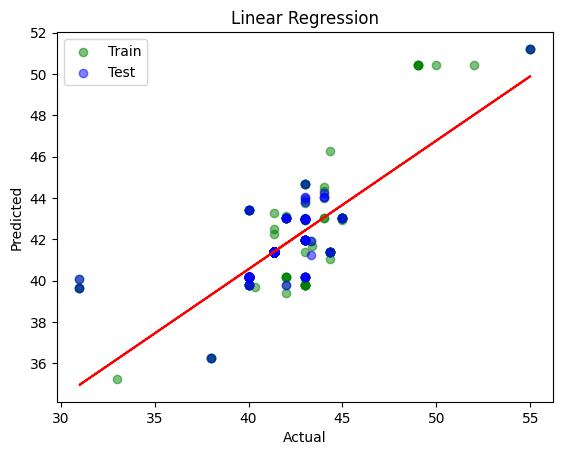

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x = y_train ,y = y_lr_train_pred, alpha = 0.5, c= "green", label = "Train")
plt.scatter(x = y_test ,y = y_lr_test_pred, alpha = 0.5, c = "blue" ,label = "Test")
plt.legend()

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color = "red")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

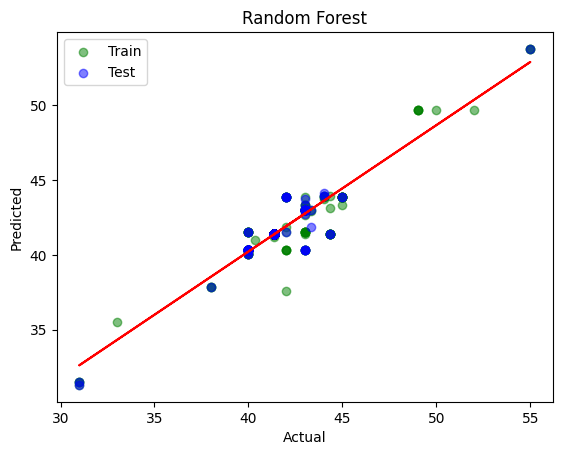

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x = y_train ,y = y_rf_train_pred, alpha = 0.5, c= "green", label = "Train")
plt.scatter(x = y_test ,y = y_rf_test_pred, alpha = 0.5, c = "blue" ,label = "Test")
plt.legend()

z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color = "red")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest")
plt

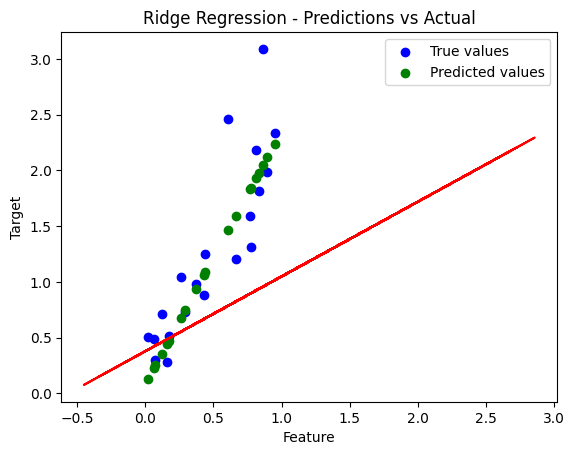

In [44]:
# Optional: Visualize the results
plt.scatter(x_test, y_test, color='blue', label='True values')
plt.scatter(x_test, y_pred_test, color='green', label='Predicted values')
plt.xlabel('Feature')
plt.ylabel('Target')

z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color = "red")

plt.legend()
plt.title('Ridge Regression - Predictions vs Actual')
plt.show()


# Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define your model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation for Mean Squared Error (MSE)
mse_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)  # Convert negative MSE to positive RMSE

# Print each fold’s RMSE and the average RMSE
print("RMSE for each fold:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

# Optionally, perform cross-validation for R^2 score as well
r2_scores = cross_val_score(model, x, y, cv=5, scoring='r2')
print("R^2 for each fold:", r2_scores)
print("Average R^2:", r2_scores.mean())


RMSE for each fold: [2.15983579 0.14696723 0.15186243 0.15457262 1.56065467]
Average RMSE: 0.8347785479366232
R^2 for each fold: [-0.76076898  0.97598316  0.9743566   0.97343316 -0.14946536]
Average R^2: 0.4027077159033787


Interpretation
High Variability in RMSE and R² Scores Across Folds:

Folds 2, 3, and 4 have very low RMSE (around 0.15) and high R² scores (close to 0.97), indicating that the model performs very well on these folds.
Folds 1 and 5, however, have significantly higher RMSE and much lower (even negative) R² scores. Negative R² scores imply that the model is performing worse than simply predicting the mean value of the target variable on those folds.
This variability suggests that the model’s performance is inconsistent across different subsets of the data.

Average RMSE and R²:

The average RMSE is 0.8348, which is skewed by the high errors in Folds 1 and 5.
The average R² score is 0.4027, indicating that the model explains only about 40.3% of the variance on average, which is much lower than what we saw on the individual folds with high R² values.
Potential Causes and Solutions
The inconsistency across folds could be due to several factors, such as:

1. Data Imbalance or Outliers:
Some folds may contain outliers or specific patterns that are not present in other folds, which could cause the model to perform poorly on certain subsets of data.
Solution: Analyze the data in Folds 1 and 5 to check for outliers or specific features that could be affecting performance. Consider removing or transforming outliers if they negatively impact the model.
2. Insufficient Data for Certain Patterns:
The model may not be capturing certain patterns effectively across all subsets, which could be leading to poor performance on specific folds.
Solution: Try feature engineering to capture underlying patterns better or increase the dataset size if possible. For example, adding lagged features or interaction terms might help if this is time series data.
3. Hyperparameter Tuning:
The default settings for Random Forest may not be optimal. Hyperparameter tuning could help make the model more robust and generalizable.
Solution: Use GridSearchCV or RandomizedSearchCV to optimize parameters such as n_estimators, max_depth, min_samples_split, and min_samples_leaf. These adjustments can help the model better fit various subsets of the data.

## Hyperparameter tuning


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x, y)

# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", (-grid_search.best_score_) ** 0.5)


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best RMSE: 1.0181576518003859


# Compliling All Models

In [56]:
df_models = pd.concat((lr_results, rf_results, R_results, Lasso_results), axis = 0)
df_models.reset_index(drop = True, inplace = True)
df_models


,Methods,Train MSE,Test MSE,Train r2,Test r2
0,Linear Regression,0.646086,0.53077,0.621988,0.526236
1,Random Forest,0.213212,0.141241,0.875254,0.873929
2,Ridge Regression,0.211988,0.162791,0.67897,0.733008
3,Lasso Regression,0.034701,0.019404,0.967064,0.968319


### Evaluate Model Performance